<a href="https://colab.research.google.com/github/Ruchit13/webapp/blob/master/PCOS_data_analysis_and_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Dataset

In [ ]:
df=pd.read_csv('/content/drive/My Drive/PCOS/PCOS_data.csv')

Reading the dataset

In [ ]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0,0,120,80,3,4,16.0,14.0,7.0,NaN


Number of Columns and Rows

In [ ]:
df.shape

(541, 43)

Detailed Description of the dataset

In [ ]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,10271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,4.94085,7.680926,0.380776,0.288355,14.601832,6.469919,6.904831,37.992606,33.841035,0.891895,2.981281,5.619340,24.321497,49.915874,0.610945,99.835860,0.377079,0.273567,0.306839,0.452865,0.489834,0.513863,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,1.49202,4.803835,0.486027,0.692575,217.022081,86.673255,60.691822,3.967920,3.596894,0.046326,3.755532,5.877243,14.970391,346.206599,3.808853,18.559298,0.485104,0.446202,0.461609,0.498234,0.500359,0.500270,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,10001.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,0.00000,0.000000,0.000000,0.000000,0.210000,0.020000,0.002146,26.000000,24.000000,0.755556,0.040000,0.100000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,10136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,4.00000,4.000000,0.000000,0.000000,3.300000,1.020000,1.416244,36.000000,32.000000,0.857143,1.480000,2.010000,14.520000,20.800000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,10271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,5.00000,7.000000,0.000000,0.000000,4.850000,2.300000,2.169231,38.000000,34.000000,0.894737,2.260000,3.700000,21.920000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,10406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,5.00000,10.000000,1.000000,0.000000,6.410000,3.680000,3.959184,40.000000,36.000000,0.928571,3.570000,6.900000,29.890000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,10541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.00000,30.000000,1.000000,5.000000,5052.000000,2018.000000,1372.826087,48.000000,47.000000,0.979167,65.000000,66.000000,128.240000,6014.660000,85.000000,350.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


Names of all columns

In [ ]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Unnamed: 42'],
      dtype='object')

Removing the unnecessary columns

In [ ]:
df = df.drop(['Sl. No','Unnamed: 42','Patient File No.','Marraige Status (Yrs)','Blood Group','Hip(inch)','Waist(inch)'],axis = 1)

In [ ]:
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Pregnant(Y/N),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,78,22,10.48,2,5,0,0,7.95,3.68,2.160326,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,74,20,11.70,2,5,1,0,6.73,1.09,6.174312,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,72,18,11.80,2,5,1,0,5.54,0.88,6.295455,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,72,20,12.00,2,5,0,0,8.06,2.36,3.415254,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,72,18,10.00,2,5,1,0,3.98,0.90,4.422222,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0,0,120,80,3,4,16.0,14.0,7.0


Introducing a new column 'Follicle_count' which gives the count of Follicles.

In [ ]:
df['Follicle_count']=df['Follicle No. (L)'] + df['Follicle No. (R)']

In [ ]:
df = df.drop(['Follicle No. (L)','Follicle No. (R)','Avg. F size (L) (mm)', 'Avg. F size (R) (mm)','Endometrium (mm)','Hb(g/dl)'],axis = 1)

#EDA

Renaming the columns for ease of working

In [ ]:
df.rename(columns={'PCOS (Y/N)':'PCOS',
                   'Age (yrs)':'Age',
                   'Weight (Kg)':'Weight',
                   'Height(Cm)':'Height',
                   'Pulse rate(bpm)':'PulseRate',
                  'RR (breaths/min)':'RR',
                   'Cycle(R/I)':'Cycle',
                   'Pregnant(Y/N)':'Pregnant',
                   'No. of aborptions':'Abortions',
                   'FSH(mIU/mL)':'FSH',
                   'TSH (mIU/L)':'TSH',
                   'LH(mIU/mL)':'LSH',
                   'AMH(ng/mL)':'AMH',
                   'PRL(ng/mL)':'PRL',
                   'Vit D3 (ng/mL)':'VitD3',
                   'PRG(ng/mL)':'PRG',
                   'RBS(mg/dl)':'RBS',
                   'Weight gain(Y/N)':'Weight_gain',
                   'hair growth(Y/N)':'hair_growth',
                   'Skin darkening (Y/N)':'Skin_darkening',
                   'Hair loss(Y/N)':'Hair_loss',
                   'FSH/LH':'FSH_LH_ratio',
                   'Pimples(Y/N)':'Pimples',
                   'Fast food (Y/N)':'Fast_food',
                   'Reg.Exercise(Y/N)':'Reg_exercise',
                   'BP _Systolic (mmHg)':'BP_systolic',
                   'BP _Diastolic (mmHg)':'BP_diastolic',
                   'Waist:Hip Ratio':'W_H_ratio' },  
                 inplace=True)
 

Datatype of Columns


In [ ]:
df.dtypes

PCOS                    int64
Age                     int64
Weight                float64
Height                float64
BMI                   float64
PulseRate               int64
RR                      int64
Cycle                   int64
Cycle length(days)      int64
Pregnant                int64
Abortions               int64
FSH                   float64
LSH                   float64
FSH_LH_ratio          float64
W_H_ratio             float64
TSH                   float64
AMH                   float64
PRL                   float64
VitD3                 float64
PRG                   float64
RBS                   float64
Weight_gain             int64
hair_growth             int64
Skin_darkening          int64
Hair_loss               int64
Pimples                 int64
Fast_food               int64
Reg_exercise            int64
BP_systolic             int64
BP_diastolic            int64
Follicle_count          int64
dtype: object

Check for Null Values

In [ ]:
df.isnull().any()

PCOS                  False
Age                   False
Weight                False
Height                False
BMI                   False
PulseRate             False
RR                    False
Cycle                 False
Cycle length(days)    False
Pregnant              False
Abortions             False
FSH                   False
LSH                   False
FSH_LH_ratio          False
W_H_ratio             False
TSH                   False
AMH                   False
PRL                   False
VitD3                 False
PRG                   False
RBS                   False
Weight_gain           False
hair_growth           False
Skin_darkening        False
Hair_loss             False
Pimples               False
Fast_food             False
Reg_exercise          False
BP_systolic           False
BP_diastolic          False
Follicle_count        False
dtype: bool

## 1) EDA on Categorical Values



### Number of the patients who are diagnosed with PCOS

In [ ]:
df['PCOS'].value_counts().to_frame(name='0/1:N/Y')

,0/1:N/Y
0,364
1,177


### Number of patients that are pregnant

In [ ]:
df['Pregnant'].value_counts()

0    335
1    206
Name: Pregnant, dtype: int64

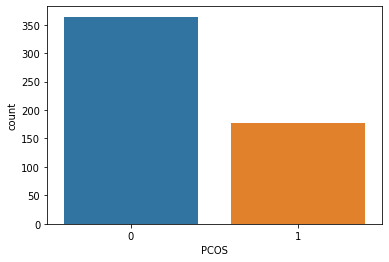

In [ ]:
sns.countplot(df['PCOS'])

### PCOS vs Pregnancy

In [ ]:
pd.crosstab(df.PCOS,df.Pregnant,margins=True).T

PCOS,0,1,All
Pregnant,,,
0,222,113,335
1,142,64,206
All,364,177,541


We infer that out of 177 patients that were diagnosed with PCOS,113 weren't pregnant whereas 64 were pregnant.
That indicates that the chances of having a infant is only **36%**

***Ergo, PCOS reduces the chances of having babies***



### PCOS vs No of abortions

In [ ]:
pd.crosstab(df.PCOS,df.Abortions,margins=True)

Abortions,0,1,2,3,4,5,All
PCOS,,,,,,,
0,291,47,14,9,2,1,364
1,146,22,8,1,0,0,177
All,437,69,22,10,2,1,541


Binning the Number of Abortions 

In [ ]:
df['Abortion_band']=0
df.loc[df['Abortion_band']<=0 ,'Abortion_band']=0
df.loc[(df['Abortions']>0),'Abortion_band']=1

In [ ]:
pd.crosstab(df.PCOS,df.Abortion_band,margins=True).T

PCOS,0,1,All
Abortion_band,,,
0,291,146,437
1,73,31,104
All,364,177,541


We can infer that patients suffering from PCOS have a chance of 82% in going through an abortion

Dropping the Abortions Column

In [ ]:
df = df.drop(['Abortions'],axis = 1)

### PCOS vs Weight Gain

In [ ]:
pd.crosstab(df.PCOS,df.Weight_gain,margins=True).T

PCOS,0,1,All
Weight_gain,,,
0,281,56,337
1,83,121,204
All,364,177,541


We infer that out of 177 patients that were diagnosed with PCOS 56 didn't have a major change in weight whereas 121 had a great spurt in weight.
That indicates that **68%** of patients had weight gain. 

***Ergo, PCOS leads to Weight Gain***

### PCOS vs Hirsutism

HAIR GROWTH ANALYSIS

In [ ]:
pd.crosstab(df.PCOS,df.hair_growth,margins=True).T

PCOS,0,1,All
hair_growth,,,
0,317,76,393
1,47,101,148
All,364,177,541


HAIR LOSS ANALYSIS

In [ ]:
pd.crosstab(df.PCOS,df.Hair_loss,margins = True).T

PCOS,0,1,All
Hair_loss,,,
0,221,75,296
1,143,102,245
All,364,177,541


We infer that 101 patients noticed abnormal hair growth when diagnosed with PCOS and 102 patients noticed abnormal hair loss also, which constitutes about **57%** totally. 

***Ergo, PCOS can lead to abnormal increase in either Hair Growth or Hair Fall***. 

### PCOS vs Skin Darkening

In [ ]:
pd.crosstab(df.PCOS,df.Skin_darkening,margins = True).T

PCOS,0,1,All
Skin_darkening,,,
0,308,67,375
1,56,110,166
All,364,177,541


We can infer that the patients skin darkens **62%** of the time when suffering from PCOS.

***Ergo,PCOS results in Skin Darkening***

### PCOS vs Pimples

In [ ]:
pd.crosstab(df.PCOS,df.Pimples,margins = True).T

PCOS,0,1,All
Pimples,,,
0,222,54,276
1,142,123,265
All,364,177,541


We can infer that patients see a sustaintial increase ~ (**69%**) in pimples when suffering from PCOS.

***Ergo, PCOS increases the state of pimples on the face.***



## 2) EDA on Continuous Values

In [ ]:
df.head()

,PCOS,Age,Weight,Height,BMI,PulseRate,RR,Cycle,Cycle length(days),Pregnant,FSH,LSH,FSH_LH_ratio,W_H_ratio,TSH,AMH,PRL,VitD3,PRG,RBS,Weight_gain,hair_growth,Skin_darkening,Hair_loss,Pimples,Fast_food,Reg_exercise,BP_systolic,BP_diastolic,Follicle_count,Abortion_band
0,0,28,44.6,152.0,19.300000,78,22,2,5,0,7.95,3.68,2.160326,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1,0,110,80,6,0
1,0,36,65.0,161.5,24.921163,74,20,2,5,1,6.73,1.09,6.174312,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0,0,120,70,8,0
2,1,33,68.8,165.0,25.270891,72,18,2,5,1,5.54,0.88,6.295455,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1,0,120,80,28,0
3,0,37,65.0,148.0,29.674945,72,20,2,5,0,8.06,2.36,3.415254,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0,0,120,70,4,0
4,0,25,52.0,161.0,20.060954,72,18,2,5,1,3.98,0.90,4.422222,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0,0,120,80,7,0


### Age Band

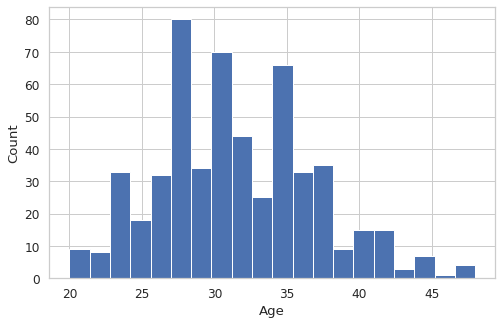

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Age'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Age', ylabel='Count');

In [ ]:
print('The minimum age of a patient here is:',min(df.Age))
print('The maximum age of a patient here is:',max(df.Age))

The minimum age of a patient here is: 20
The maximum age of a patient here is: 48


Since Age is a continuous variable, therefore to compare them, we group the ages into bins.Since the minimum age is 20 and maximum age is 48, we divide the ages into bins of 4 having age differences of 7

In [ ]:
df['Age_band']=1
df.loc[df['Age_band']<=27 ,'Age_band']=1
df.loc[(df['Age']>27)&(df['Age']<=34),'Age_band']=2
df.loc[(df['Age']>34)&(df['Age']<=41),'Age_band']=3
df.loc[(df['Age']>41)&(df['Age']<=48),'Age_band']=4

Group 1 - Age <= 27

---


Group 2 - Age > 27 and Age <= 34

---


Group 3 - Age > 34 and Age <= 41

---


Group 4 - Age > 41 and Age <= 48


### PCOS vs Age

In [ ]:
pd.crosstab(df.Age_band,df.PCOS,margins = True)

PCOS,0,1,All
Age_band,,,
1,76,59,135
2,162,85,247
3,111,27,138
4,15,6,21
All,364,177,541


We infer that out of 177 patients daignosed with PCOS, the highest number of patients were found in Group 1 and 2.

***Ergo, chances of females having PCOS until the age of 34 is 81%***

### PCOS vs Pulse Rate

In [ ]:
pd.crosstab(df.PCOS,df.PulseRate,margins=True)

PulseRate,13,18,70,72,73,74,75,76,78,80,82,All
PCOS,,,,,,,,,,,,
0,1,1,37,190,10,62,4,3,36,18,2,364
1,0,0,8,83,7,39,3,1,24,11,1,177
All,1,1,45,273,17,101,7,4,60,29,3,541


The chances of PCOS affecting the patients pulse rate is significantly low.
In most of the cases, the pulse rate has no connection with PCOS and turns out to be conventional

In [ ]:
df.head()

,PCOS,Age,Weight,Height,BMI,PulseRate,RR,Cycle,Cycle length(days),Pregnant,FSH,LSH,FSH_LH_ratio,W_H_ratio,TSH,AMH,PRL,VitD3,PRG,RBS,Weight_gain,hair_growth,Skin_darkening,Hair_loss,Pimples,Fast_food,Reg_exercise,BP_systolic,BP_diastolic,Follicle_count,Abortion_band,Age_band
0,0,28,44.6,152.0,19.300000,78,22,2,5,0,7.95,3.68,2.160326,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1,0,110,80,6,0,2
1,0,36,65.0,161.5,24.921163,74,20,2,5,1,6.73,1.09,6.174312,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0,0,120,70,8,0,3
2,1,33,68.8,165.0,25.270891,72,18,2,5,1,5.54,0.88,6.295455,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1,0,120,80,28,0,2
3,0,37,65.0,148.0,29.674945,72,20,2,5,0,8.06,2.36,3.415254,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0,0,120,70,4,0,3
4,0,25,52.0,161.0,20.060954,72,18,2,5,1,3.98,0.90,4.422222,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0,0,120,80,7,0,1


### PCOS vs FSH/LH ratio

FSH is a follicle Stimulating Hormone. Women with PCOS often do not ovulate on a monthly basis due to low FSH levels.

LH is a Luteinizing hormone. Women with PCOS often have high levels of LH secretion.

The levels of FSH and LH lies between 5-20 mlU/ml range for a normal woman.



In [ ]:
pd.crosstab(df.PCOS,df.FSH_LH_ratio>0.3,margins=True)

FSH_LH_ratio,False,True,All
PCOS,,,
0,1,363,364
1,1,176,177
All,2,539,541


We can notice that as the ratio increases, the number of PCOS patients decreases.Also for PCOS patients, the ratio is close to 0.33. 
Or LH level is often two or three times that of the FSH level. For example, it is typical for women with PCOS to have an LH level of about 18 mlU/ml and a FSH level of about 6 mlU/ml. This situation is called an elevated LH to FSH ratio or a ratio of 3:1. This change in the LH to FSH ratio is enough to disrupt ovulation.

### PCOS vs TSH and AMH and PRL and Vitd3 levels

***TSH is a thyroid stimulating hormone.***

Women with PCOS usually have normal TSH levels (0.4-3.8 uIU/ml). TSH is checked to rule out other problems, such as an underactive or overactive thyroid, which often cause irregular or lack of periods and anovulation. 

---
***AMH is a Anti Mullerian Hormone***

Women with PCOS often have elevated AMH levels. At any age, a score over 48 pmol/L is considered high and could be a sign of PCOS. 

---
***PRL is Prolactin level.***
Patients with PCOS can have mildly elevated prolactin levels

---
***Vitd3 is Vitamin D3 level***
The prevalence of vitamin D deficiency in women with PCOS is about 67-85%





### PCOS vs Follicle Count

In [ ]:
pd.crosstab(df.PCOS,(df.Follicle_count>15),margins=True).T

PCOS,0,1,All
Follicle_count,,,
False,319,42,361
True,45,135,180
All,364,177,541


A typical antral follicle count is 10-15 follicles totally.
We can see that patients having count more than 15 have higher chances of having PCOS. In our dataset, we have 76% of our patients having count>15 and are suffering from PCOS.

***Ergo,having follicle count more than 15 can show high signs of PCOS***

# Feature Scaling

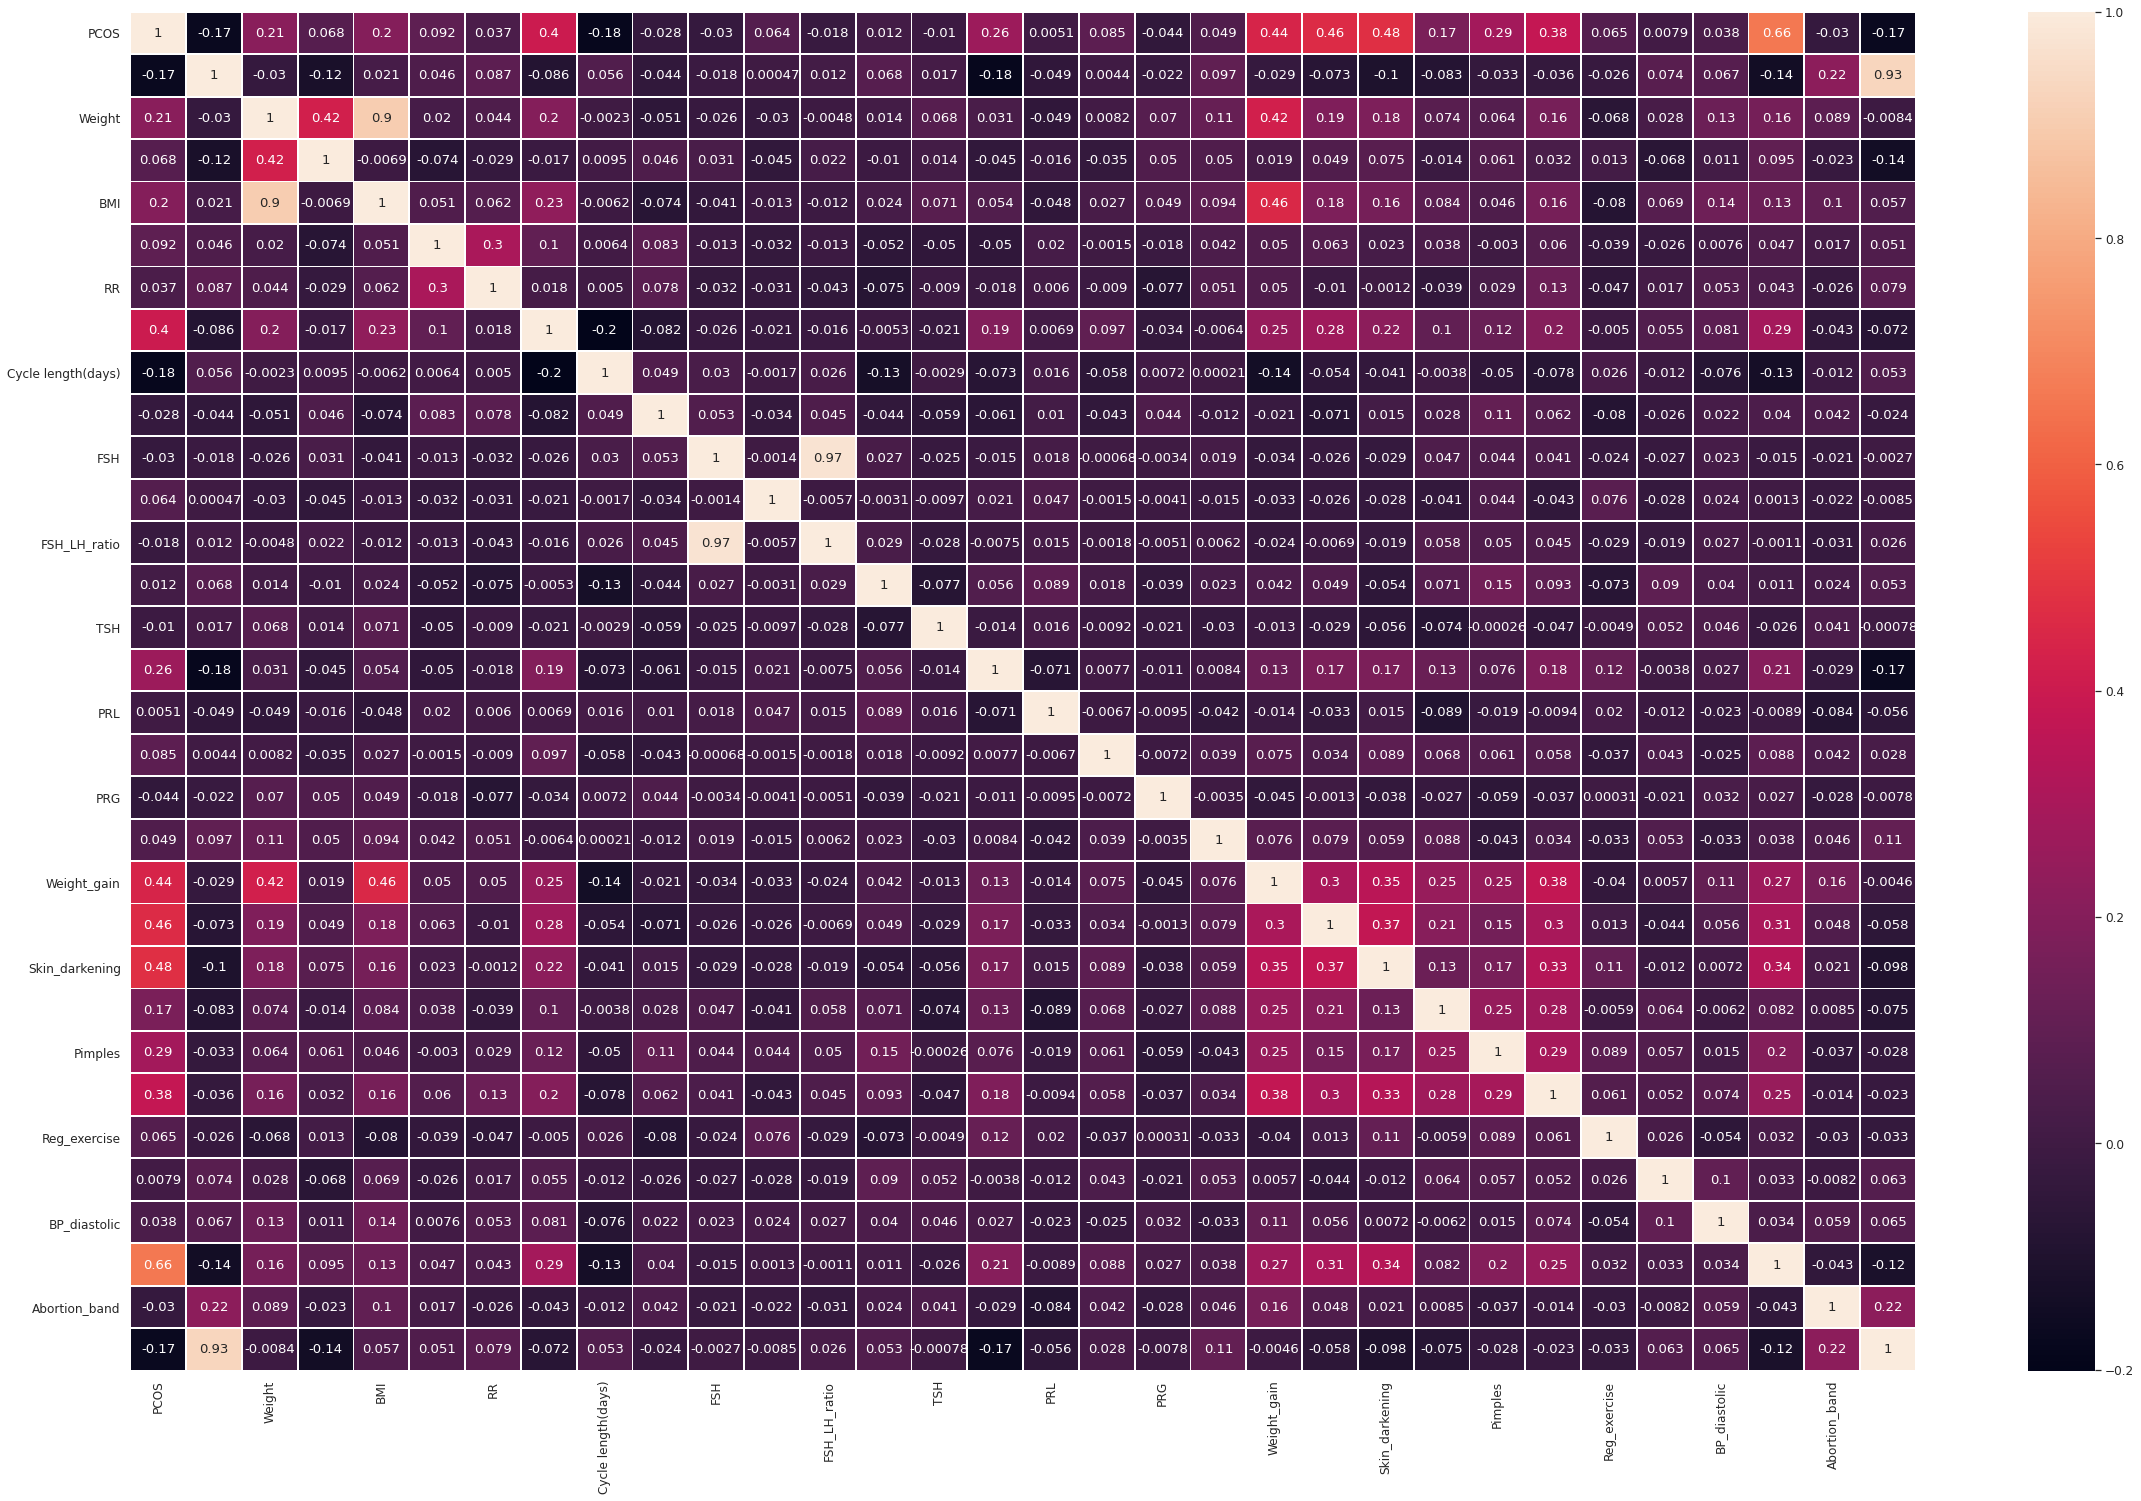

In [ ]:
sns.heatmap(df.corr(),annot=True,linewidths=0.9)
fig = plt.gcf()
fig.set_size_inches(40,25)
plt.show()

We drop the column Weight since there is a high positive co-relation between the features Weight and PCOS

In [ ]:
df = df.drop(['Weight'],axis=1)

In [ ]:
df.columns

Index(['PCOS', 'Age', 'Height', 'BMI', 'PulseRate', 'RR', 'Cycle',
       'Cycle length(days)', 'Pregnant', 'FSH', 'LSH', 'FSH_LH_ratio',
       'W_H_ratio', 'TSH', 'AMH', 'PRL', 'VitD3', 'PRG', 'RBS', 'Weight_gain',
       'hair_growth', 'Skin_darkening', 'Hair_loss', 'Pimples', 'Fast_food',
       'Reg_exercise', 'BP_systolic', 'BP_diastolic', 'Follicle_count',
       'Abortion_band', 'Age_band'],
      dtype='object')

# Dividing the data into Test and Train 

In [ ]:
from sklearn.model_selection import train_test_split 
X = df.iloc[:,1:].values
y= df.iloc[:,:1].values
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=0,stratify=df['PCOS'])

# Standardising the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

# Predicting the Model

## Importing the Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

## Algorithms in Use

1. Logistic Regression
2. Support Vector Machine
3. Random Forest
4. KNN
5. Naive Bayes
6. Decision Trees



### Logistic Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model_lr = lr()
model_lr.fit(train_X,train_y)
lr_pred = model_lr.predict(test_X)
print('Accuracy of Logistic Regression is ',metrics.accuracy_score(lr_pred,test_y)*100,'%')
print('---------------------------------------------------')
print('The confusion Matrix')
confusion_matrix(test_y,lr_pred)

Accuracy of Logistic Regression is  90.1840490797546 %
---------------------------------------------------
The confusion Matrix


array([[103,   7],
       [  9,  44]])

### Support Vector Machine - RBF

In [ ]:
model_svm_rbf=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model_svm_rbf.fit(train_X,train_y)
svm_pred_rbf= model_svm_rbf.predict(test_X)
print('Accuracy of SVM - RBF is',metrics.accuracy_score(svm_pred_rbf,test_y)*100,'%')
print('---------------------------------------------------')
print('The confusion Matrix')
confusion_matrix(test_y,svm_pred_rbf)

Accuracy of SVM - RBF is 85.2760736196319 %
---------------------------------------------------
The confusion Matrix


array([[104,   6],
       [ 18,  35]])

### Support Vector Machine - Linear

In [ ]:
model_svm_linear=svm.SVC(kernel='linear',C=1,gamma=0.1)
model_svm_linear.fit(train_X,train_y)
svm_pred_linear = model_svm_linear.predict(test_X)
print('Accuracy of SVM - Linear is',metrics.accuracy_score(svm_pred_linear,test_y)*100,'%')
print('---------------------------------------------------')
print('The confusion Matrix')
confusion_matrix(test_y,svm_pred_linear)

Accuracy of SVM - Linear is 89.57055214723927 %
---------------------------------------------------
The confusion Matrix


array([[102,   8],
       [  9,  44]])

### Random Forest 

In [ ]:
model_rfc=rfc(n_estimators=100)
model_rfc.fit(train_X,train_y)
prediction7=model_rfc.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_y)*100,'%')
print('---------------------------------------------------')
print('The confusion Matrix')
confusion_matrix(test_y,prediction7)

The accuracy of the Random Forests is 90.79754601226993 %
---------------------------------------------------
The confusion Matrix


array([[105,   5],
       [ 10,  43]])

### KNN

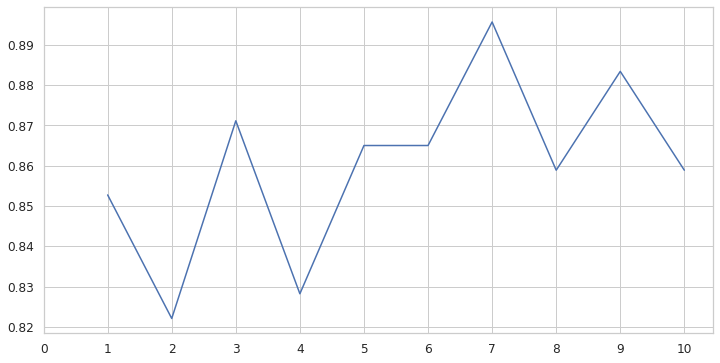

Accuracies for different values of n are: [0.85276074 0.82208589 0.87116564 0.82822086 0.86503067 0.86503067
 0.89570552 0.85889571 0.88343558 0.85889571] with the max value as  89.57055214723927 %
---------------------------------------------------
The confusion Matrix


array([[105,   5],
       [ 18,  35]])

In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model_knn=KNeighborsClassifier(n_neighbors=i) 
    model_knn.fit(train_X,train_y)
    prediction=model_knn.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max()*100,'%')
print('---------------------------------------------------')
print('The confusion Matrix')
confusion_matrix(test_y,prediction)

### Naive Bayes

In [ ]:
model_naive = nb()
model_naive.fit(train_X,train_y)
prediction6=model_naive.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_y)*100,'%')
print('---------------------------------------------------')
print('The confusion Matrix')
confusion_matrix(test_y,prediction6)

The accuracy of the NaiveBayes is 78.52760736196319 %
---------------------------------------------------
The confusion Matrix


array([[78, 32],
       [ 3, 50]])

### Decision Tree

In [ ]:
model_decision_tree=DecisionTreeClassifier()
model_decision_tree.fit(train_X,train_y)
dt_pred=model_decision_tree.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(dt_pred,test_y)*100,'%')
print('---------------------------------------------------')
print('The confusion Matrix')
confusion_matrix(test_y,dt_pred)

The accuracy of the Decision Tree is 78.52760736196319 %
---------------------------------------------------
The confusion Matrix


array([[89, 21],
       [14, 39]])

In [ ]:
df.head()

,PCOS,Age,Height,BMI,PulseRate,RR,Cycle,Cycle length(days),Pregnant,FSH,LSH,FSH_LH_ratio,W_H_ratio,TSH,AMH,PRL,VitD3,PRG,RBS,Weight_gain,hair_growth,Skin_darkening,Hair_loss,Pimples,Fast_food,Reg_exercise,BP_systolic,BP_diastolic,Follicle_count,Abortion_band,Age_band
0,0,28,152.0,19.300000,78,22,2,5,0,7.95,3.68,2.160326,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1,0,110,80,6,0,2
1,0,36,161.5,24.921163,74,20,2,5,1,6.73,1.09,6.174312,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0,0,120,70,8,0,3
2,1,33,165.0,25.270891,72,18,2,5,1,5.54,0.88,6.295455,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1,0,120,80,28,0,2
3,0,37,148.0,29.674945,72,20,2,5,0,8.06,2.36,3.415254,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0,0,120,70,4,0,3
4,0,25,161.0,20.060954,72,18,2,5,1,3.98,0.90,4.422222,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0,0,120,80,7,0,1
